In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = '2015-01-01'
end = '2017-01-01'

In [3]:
united = get_pricing('UAL', start_date=start, end_date=end)
american = get_pricing('AAL', start_date=start, end_date=end)

In [4]:
united.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,67.740,68.08,65.71,66.380,5678309.0,66.380
2015-01-05 00:00:00+00:00,66.870,67.35,65.50,66.140,4263592.0,66.140
2015-01-06 00:00:00+00:00,66.630,67.00,63.11,64.599,5422328.0,64.599
2015-01-07 00:00:00+00:00,64.959,66.11,64.00,65.530,4230901.0,65.530
2015-01-08 00:00:00+00:00,65.700,67.52,65.41,66.540,5515839.0,66.540


In [5]:
american.head()

,open_price,high,low,close_price,volume,price
2015-01-02 00:00:00+00:00,53.222,53.536,52.036,52.859,9507330.0,52.859
2015-01-05 00:00:00+00:00,53.310,53.477,52.301,52.830,10401276.0,52.830
2015-01-06 00:00:00+00:00,53.212,53.369,51.114,52.006,12491282.0,52.006
2015-01-07 00:00:00+00:00,52.340,52.605,51.104,51.967,9316925.0,51.967
2015-01-08 00:00:00+00:00,52.438,53.222,52.212,52.614,8802391.0,52.614


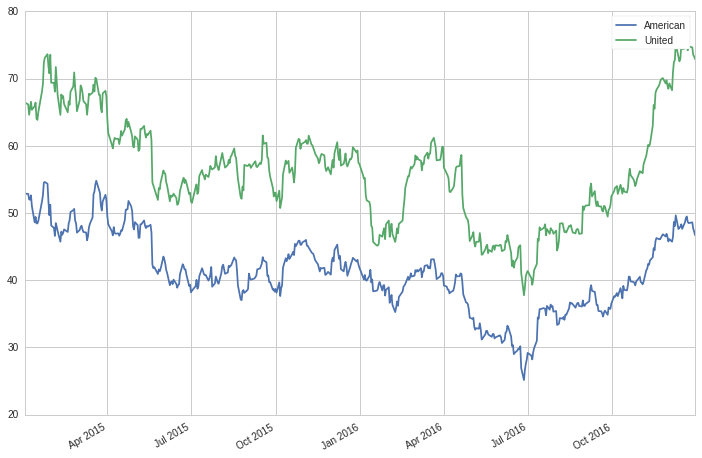

In [6]:
american['close_price'].plot(label='American', figsize=(12, 8))
united['close_price'].plot(label='United')
plt.legend()

In [7]:
np.corrcoef(x=american['close_price'], y=united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

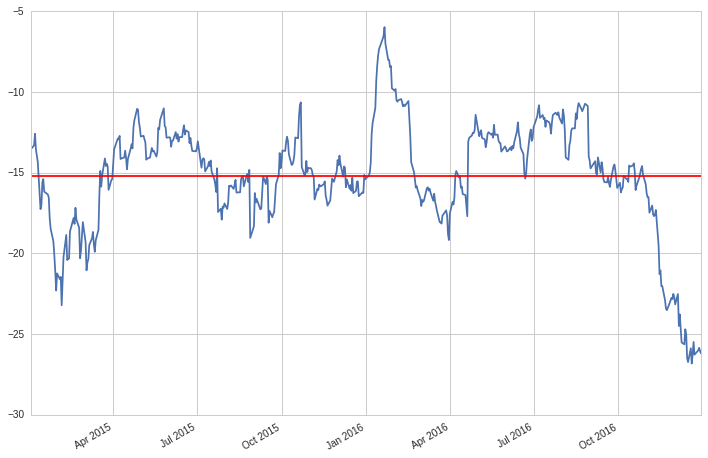

In [8]:
spread = american['close_price'] - united['close_price']
spread.plot(label='spread', figsize=(12, 8))
plt.axhline(spread.mean(), c='r')

In [9]:
def zscore(stocks):
    return (stocks-stocks.mean())/np.std(stocks)

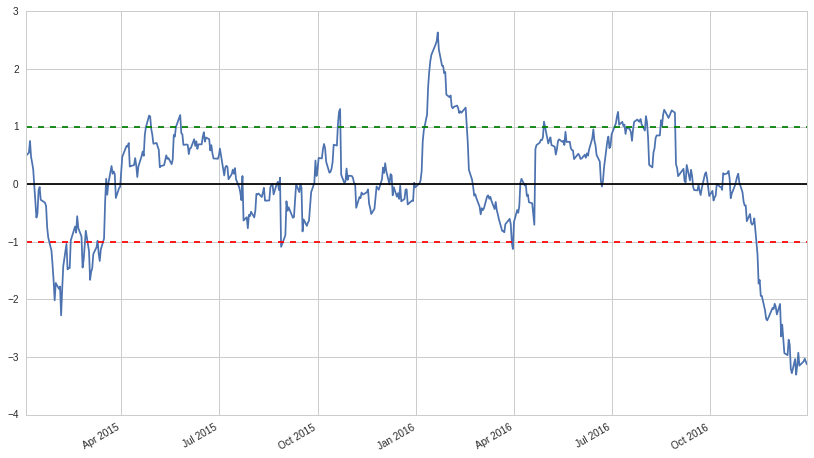

In [10]:
zscore(spread).plot(figsize=(14, 8))
plt.axhline(zscore(spread).mean(), c='black')
plt.axhline(-1.0, c='r', ls='--')
plt.axhline(1.0, c='g', ls='--')

In [11]:
spread_mavg_1 = spread.rolling(1).mean()

spread_mavg_30 = spread.rolling(30).mean()
std_30 = spread.rolling(30).std()

zscore_30_1 = (spread_mavg_1 - spread_mavg_30)/std_30

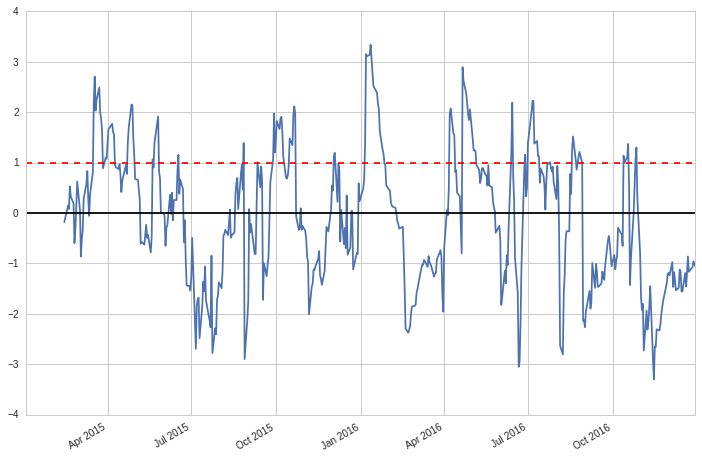

In [12]:
zscore_30_1.plot(figsize=(12, 8), label='Rolling 30 Day Z Score')
plt.axhline(0, color='black')
plt.axhline(1, c='r', ls='--')